In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Walmart.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [29]:
print("Shape of the dataset is: ", df.shape)

Shape of the dataset is:  (6435, 8)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [31]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [32]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [33]:
print("Duplicates: ", df.duplicated().any())

Duplicates:  False


In [34]:
print(df.nunique())

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64


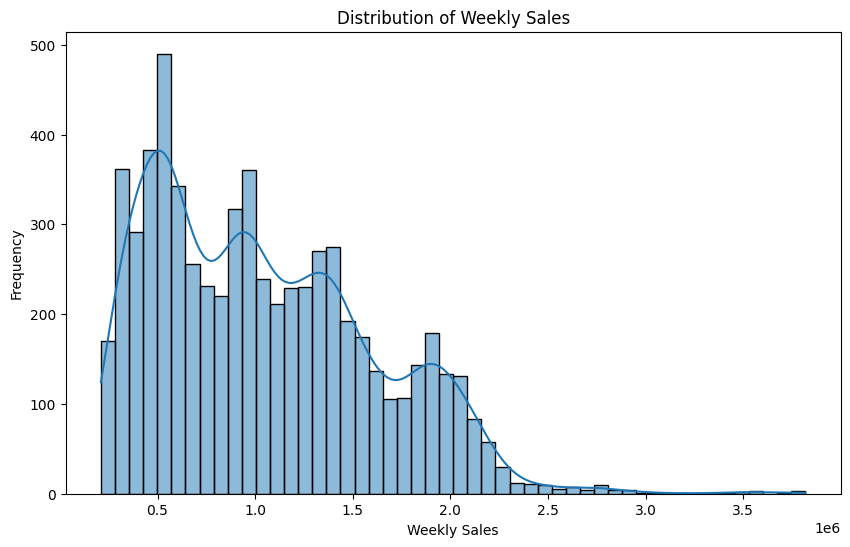

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

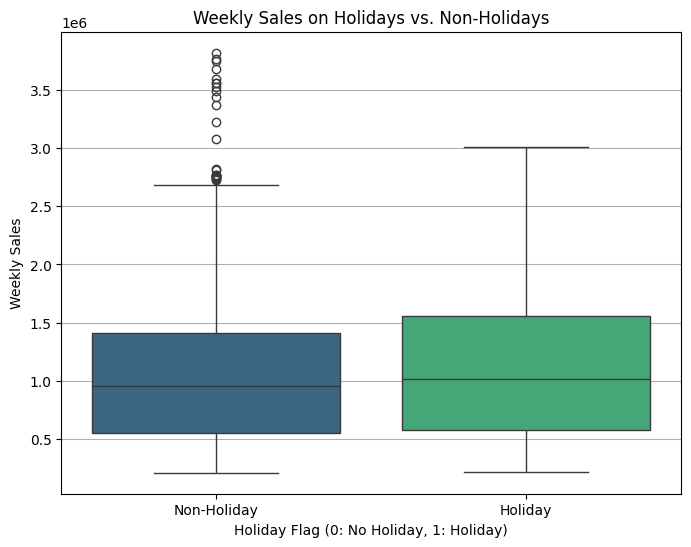

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df, hue='Holiday_Flag', palette='viridis', legend=False)
plt.title('Weekly Sales on Holidays vs. Non-Holidays')
plt.xlabel('Holiday Flag (0: No Holiday, 1: Holiday)')
plt.ylabel('Weekly Sales')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'])
plt.grid(axis='y')
plt.show()

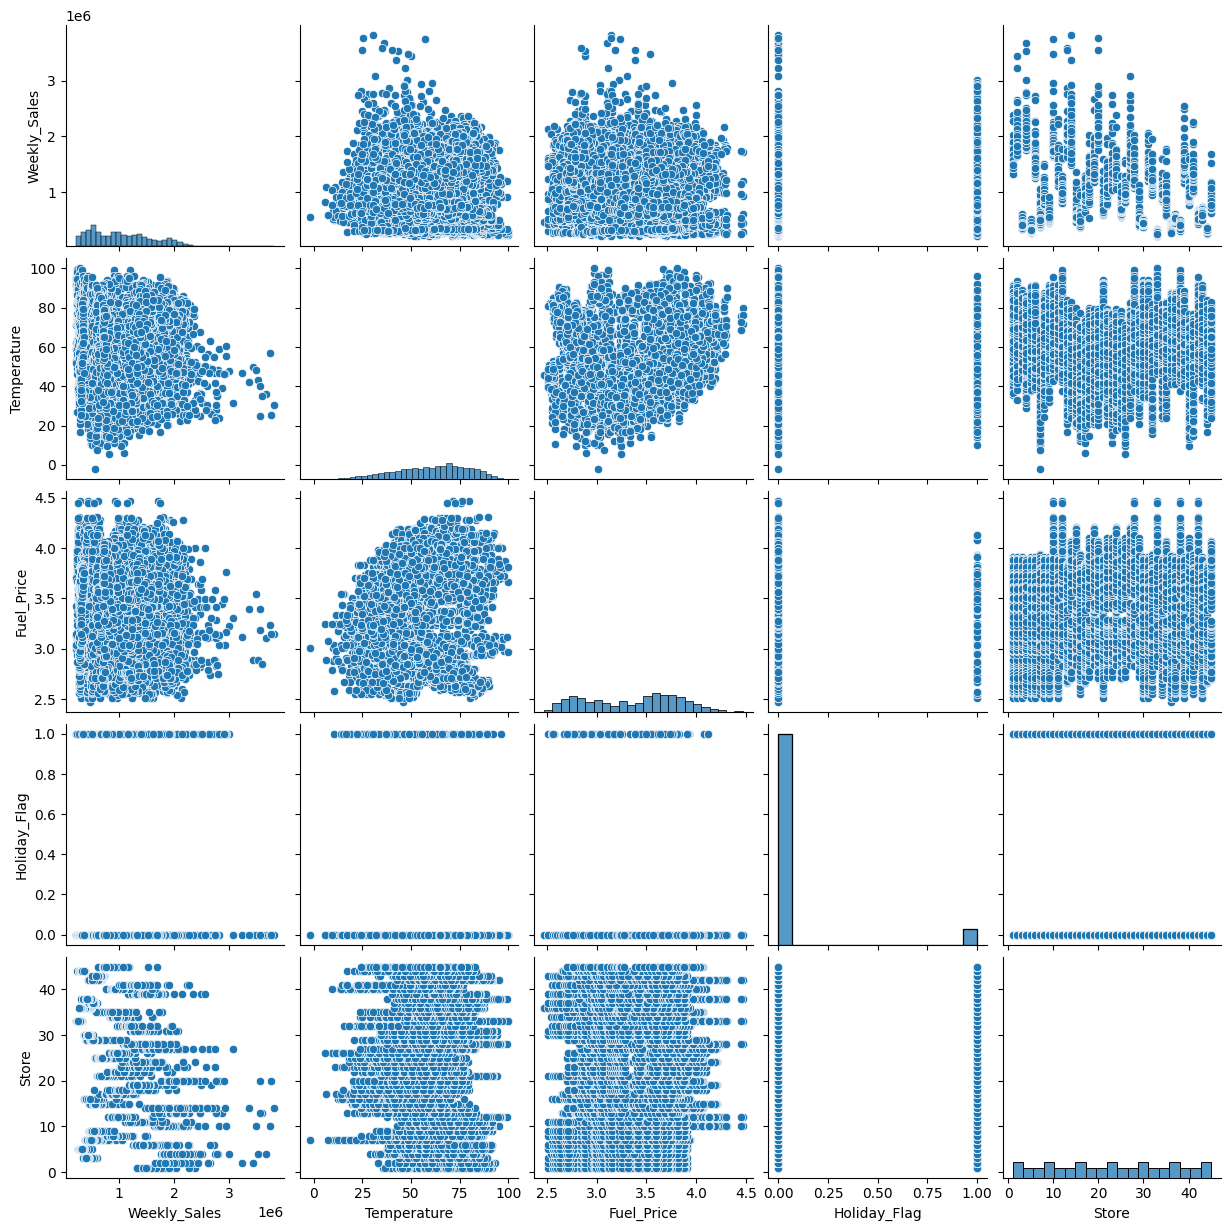

In [37]:
sns.pairplot(df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'Holiday_Flag', 'Store']])
plt.show()

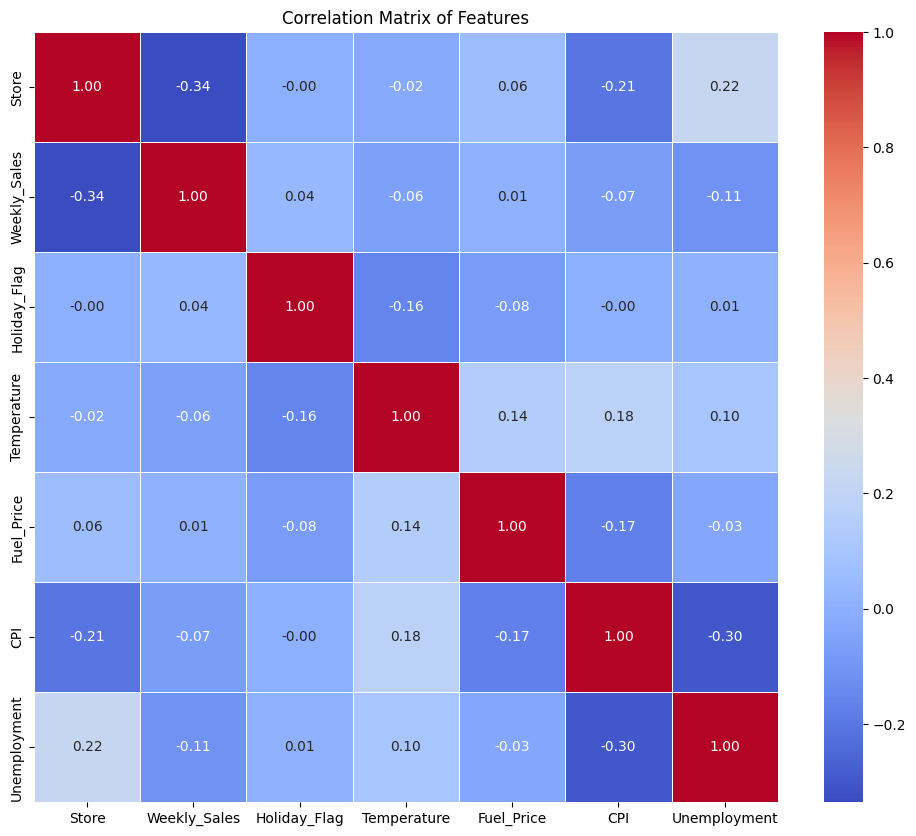

In [38]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

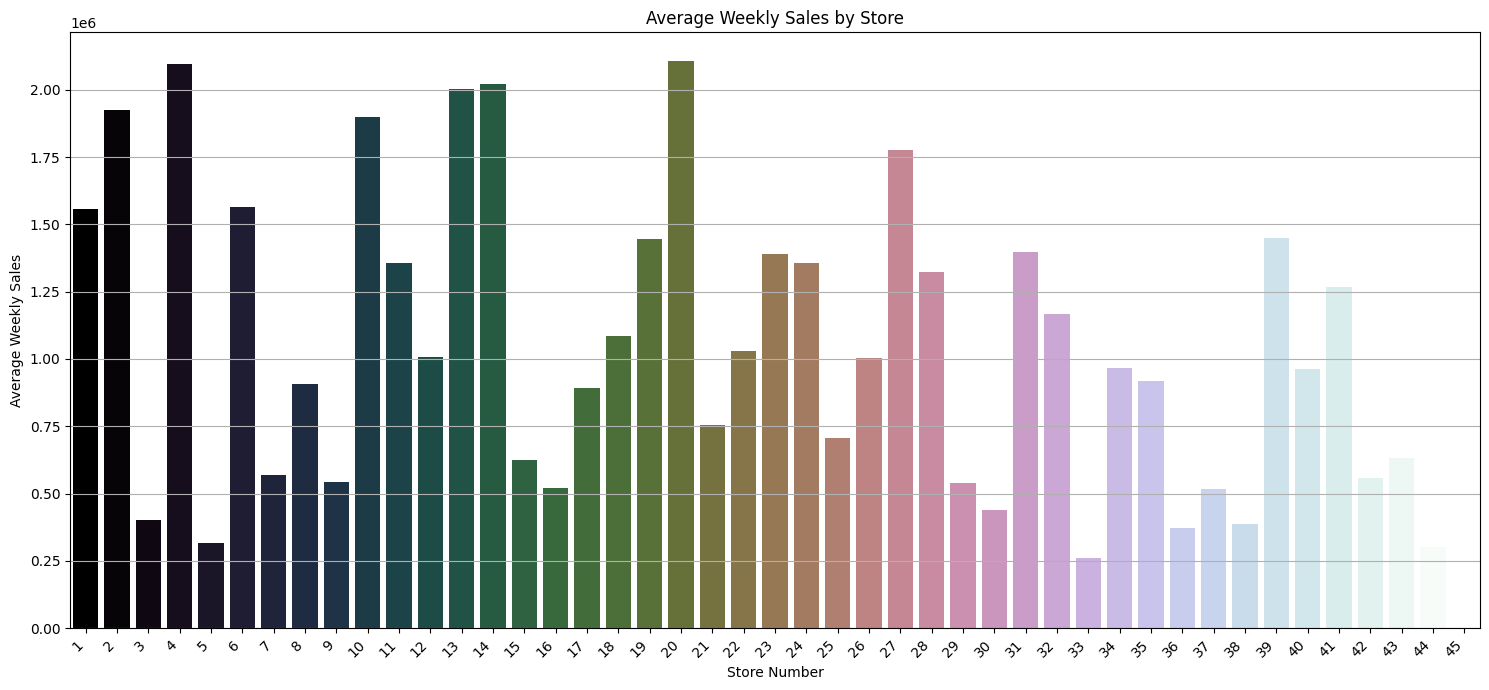

In [39]:
plt.figure(figsize=(15, 7))
avg_sales_by_store = df.groupby('Store')['Weekly_Sales'].mean().reset_index()
sns.barplot(x='Store', y='Weekly_Sales', data=avg_sales_by_store, hue='Store', palette='cubehelix', legend=False)
plt.title('Average Weekly Sales by Store')
plt.xlabel('Store Number')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [40]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [41]:
df = df.sort_values("Date")

In [42]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['DayOfYear'] = df['Date'].dt.dayofyear

In [43]:
df = df.drop('Date', axis=1)

In [44]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,DayOfWeek,DayOfYear
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,4,36
1287,10,2193048.75,0,54.34,2.962,126.442065,9.765,2010,2,5,4,36
5148,37,536006.73,0,45.97,2.572,209.852966,8.554,2010,2,5,4,36
2288,17,789036.02,0,23.11,2.666,126.442065,6.548,2010,2,5,4,36
4147,30,465108.52,0,39.05,2.572,210.752605,8.324,2010,2,5,4,36


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Year          6435 non-null   int32  
 8   Month         6435 non-null   int32  
 9   Week          6435 non-null   int64  
 10  DayOfWeek     6435 non-null   int32  
 11  DayOfYear     6435 non-null   int32  
dtypes: float64(5), int32(4), int64(3)
memory usage: 553.0 KB


In [46]:
print("Shape of dataset after feature engineering: ", df.shape)

Shape of dataset after feature engineering:  (6435, 12)


In [47]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,DayOfWeek,DayOfYear
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,6.447552,25.818182,4.0,180.762238
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,3.238308,14.129201,0.0,99.052502
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,1.000000,4.0,6.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000,14.000000,4.0,97.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000,26.000000,4.0,181.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000,38.000000,4.0,265.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,52.000000,4.0,365.000000


In [48]:
df.isnull().sum()

,0
Store,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0
Year,0
Month,0
Week,0


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

X = df.drop('Weekly_Sales', axis=1)
y = df['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numerical_cols_for_scaling = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
categorical_cols_for_ohe = ['Store', 'Holiday_Flag', 'Year', 'Month', 'Week', 'DayOfWeek', 'DayOfYear']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols_for_scaling),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_for_ohe)
    ],
    remainder='drop'
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Shapes of the datasets after splitting and preprocessing:")
print(f"X_train_processed shape: {X_train_processed.shape}")
print(f"X_test_processed shape: {X_test_processed.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Shapes of the datasets after splitting and preprocessing:
X_train_processed shape: (5148, 262)
X_test_processed shape: (1287, 262)
y_train shape: (5148,)
y_test shape: (1287,)


In [50]:
feature_names = preprocessor.get_feature_names_out()
X_train_processed_df = pd.DataFrame(X_train_processed.toarray(), columns=feature_names)
display(X_train_processed_df.head())

,num__Temperature,num__Fuel_Price,num__CPI,num__Unemployment,cat__Store_1,cat__Store_2,cat__Store_3,cat__Store_4,cat__Store_5,cat__Store_6,...,cat__DayOfYear_336,cat__DayOfYear_337,cat__DayOfYear_343,cat__DayOfYear_344,cat__DayOfYear_350,cat__DayOfYear_351,cat__DayOfYear_357,cat__DayOfYear_358,cat__DayOfYear_364,cat__DayOfYear_365
0,1.206984,-1.569833,1.078952,-0.345657,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.219506,-1.545768,0.969080,0.255566,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.740939,1.101353,-0.857126,0.109831,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.985495,-1.033846,-1.140374,1.194507,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.853095,1.320124,-0.753778,0.134568,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

ridge_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=4, include_bias=False)),
    ('ridge', Ridge(max_iter=5000, random_state=42))
])

param_grid_ridge = {
    'ridge__alpha': [0.1, 1, 10, 50, 100]
}

grid_ridge = GridSearchCV(ridge_pipeline, param_grid_ridge, scoring='r2', cv=5, n_jobs=-1, verbose=1)
grid_ridge.fit(X_train, y_train)

y_pred_ridge = grid_ridge.best_estimator_.predict(X_test)

r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print("\nRidge Regression Performance:")
print(f" Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse_ridge:.2f}")
print(f" Mean Absolute Error (MAE): {mae_ridge:.2f}")
print(f" R- Squared (R)²: {r2_ridge:.4f}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits

Ridge Regression Performance:
 Mean Squared Error (MSE): 107578298356.73
 Root Mean Squared Error (RMSE): 327991.31
 Mean Absolute Error (MAE): 252352.97
 R- Squared (R)²: 0.6549


In [52]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(
    random_state=42,
    max_features=0.8,
    ccp_alpha=0.01
)

param_grid = {
    'max_depth': [6, 8, 10],
    'min_samples_split': [20, 50, 100],
    'min_samples_leaf': [50, 100, 200],
    'max_features': ['sqrt', 0.7, 0.8],
    'ccp_alpha': [0.01, 0.02, 0.05]
}

grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_dt_model = grid_search.best_estimator_

y_pred_dt = best_dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Performance:")
print(f" Mean Squared Error MSE: {mse_dt:.2f}")
print(f" Root Mean Squared Error RMSE: {rmse_dt:.2f}")
print(f" Mean Absolute Error MAE: {mae_dt:.2f}")
print(f" R-squared R²: {r2_dt:.4f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits

Decision Tree Performance:
 Mean Squared Error MSE: 32460147067.55
 Root Mean Squared Error RMSE: 180167.00
 Mean Absolute Error MAE: 119235.98
 R-squared R²: 0.8959


In [53]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train, y_train)

best_rf_model = grid_search_rf.best_estimator_

y_pred_rf = best_rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Model Performance:")
print(f" Mean Squared Error (MSE): {mse_rf:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f" Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f" R-squared (R2): {r2_rf:.4f}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits

Random Forest Regressor Model Performance:
 Mean Squared Error (MSE): 14664385912.83
 Root Mean Squared Error (RMSE): 121096.60
 Mean Absolute Error (MAE): 61357.24
 R-squared (R2): 0.9530


In [54]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ab_model = AdaBoostRegressor(random_state=42)

param_grid_ab = {
    'n_estimators': [200, 400, 600, 800],
    'learning_rate': [0.01, 0.05, 0.1],
    'estimator': [
        DecisionTreeRegressor(max_depth=4, random_state=42),
        DecisionTreeRegressor(max_depth=6, random_state=42),
        DecisionTreeRegressor(max_depth=8, random_state=42)
    ]
}

grid_search_ab = GridSearchCV(
    estimator=ab_model,
    param_grid=param_grid_ab,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search_ab.fit(X_train, y_train)

best_ab_model = grid_search_ab.best_estimator_
y_pred_ab = best_ab_model.predict(X_test)

mse_ab = mean_squared_error(y_test, y_pred_ab)
rmse_ab = np.sqrt(mse_ab)
mae_ab = mean_absolute_error(y_test, y_pred_ab)
r2_ab = r2_score(y_test, y_pred_ab)

print("\nAdaBoost Regressor Model Performance:")
print(f" Mean Squared Error (MSE): {mse_ab:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse_ab:.2f}")
print(f" Mean Absolute Error (MAE): {mae_ab:.2f}")
print(f" R-squared (R2): {r2_ab:.4f}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits

AdaBoost Regressor Model Performance:
 Mean Squared Error (MSE): 13889030430.49
 Root Mean Squared Error (RMSE): 117851.73
 Mean Absolute Error (MAE): 72424.42
 R-squared (R2): 0.9554


In [55]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42, enable_categorical=True)

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [6, 8]
}

grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search_xgb.fit(X_train, y_train)

best_xgb_model = grid_search_xgb.best_estimator_

y_pred_xgb = best_xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost Regressor Model Performance:")
print(f" Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f" Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f" R-squared (R2): {r2_xgb:.4f}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits

XGBoost Regressor Model Performance:
 Mean Squared Error (MSE): 6207844919.30
 Root Mean Squared Error (RMSE): 78789.88
 Mean Absolute Error (MAE): 49748.02
 R-squared (R2): 0.9801


In [56]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.3 MB/s eta 0:00:00


In [57]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

cb_model = CatBoostRegressor(random_seed=42, verbose=False)

param_grid_cb = {
    'iterations': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'depth': [6, 8, 10]
}

grid_search_cb = GridSearchCV(
    estimator=cb_model,
    param_grid=param_grid_cb,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search_cb.fit(X_train, y_train)

best_cb_model = grid_search_cb.best_estimator_

y_pred_cb = best_cb_model.predict(X_test)

mse_cb = mean_squared_error(y_test, y_pred_cb)
rmse_cb = np.sqrt(mse_cb)
mae_cb = mean_absolute_error(y_test, y_pred_cb)
r2_cb = r2_score(y_test, y_pred_cb)

print("\nCatBoost Regressor Model Performance:")
print(f" Mean Squared Error (MSE): {mse_cb:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse_cb:.2f}")
print(f" Mean Absolute Error (MAE): {mae_cb:.2f}")
print(f" R-squared (R2): {r2_cb:.4f}")

Fitting 3 folds for each of 18 candidates, totalling 54 fits

CatBoost Regressor Model Performance:
 Mean Squared Error (MSE): 5530048881.77
 Root Mean Squared Error (RMSE): 74364.30
 Mean Absolute Error (MAE): 49236.52
 R-squared (R2): 0.9823


In [58]:
metrics = {
    'Model': ['Ridge Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost', 'CatBoost'],
    'R2_Score': [r2_ridge, r2_dt, r2_rf, r2_ab, r2_xgb, r2_cb],
    'RMSE': [rmse_ridge, rmse_dt, rmse_rf, rmse_ab, rmse_xgb, rmse_cb],
    'MAE': [mae_ridge, mae_dt, mae_rf, mae_ab, mae_xgb, mae_cb]
}

metrics_df = pd.DataFrame(metrics)

print("\nModel Performance Comparison:")
print(metrics_df.round(4))



Model Performance Comparison:
              Model  R2_Score         RMSE          MAE
0  Ridge Regression    0.6549  327991.3084  252352.9741
1     Decision Tree    0.8959  180166.9977  119235.9798
2     Random Forest    0.9530  121096.5974   61357.2421
3          AdaBoost    0.9554  117851.7307   72424.4170
4           XGBoost    0.9801   78789.8783   49748.0185
5          CatBoost    0.9823   74364.2984   49236.5164


/tmp/ipython-input-4162512367.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2_Score', data=metrics_df, palette='viridis')


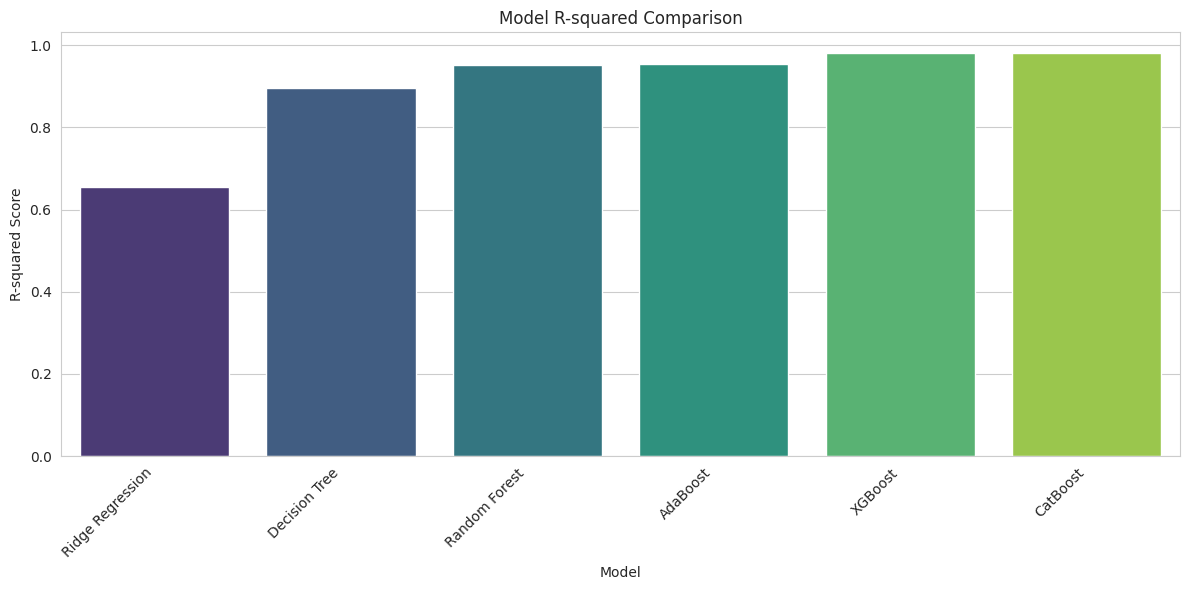


Best performing model CatBoost (R2: 0.9823)


In [59]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R2_Score', data=metrics_df, palette='viridis')
plt.title('Model R-squared Comparison')
plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

best_r2_model = metrics_df.loc[metrics_df['R2_Score'].idxmax()]

print(f"\nBest performing model {best_r2_model['Model']} (R2: {best_r2_model['R2_Score']:.4f})")

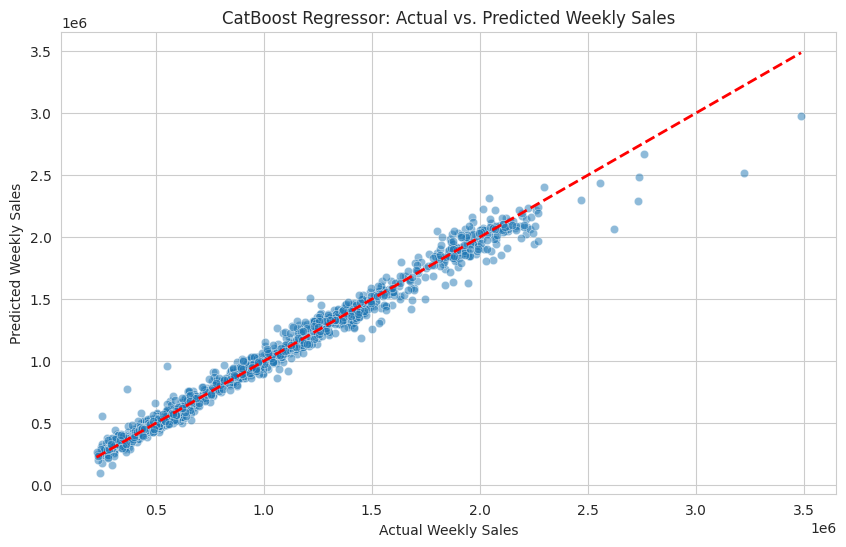

In [61]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_cb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("CatBoost Regressor: Actual vs. Predicted Weekly Sales")
plt.grid(True)
plt.show()

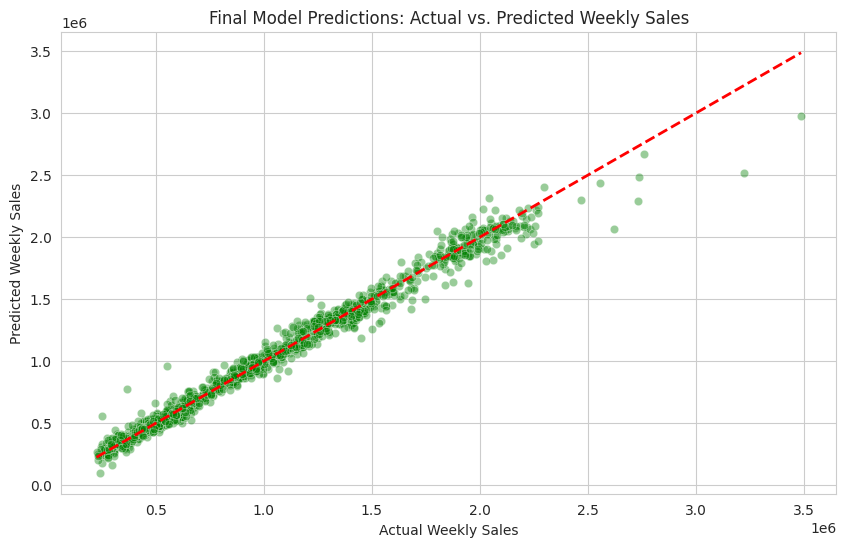

In [62]:
sns.set_style("whitegrid")

final_predictions = best_cb_model.predict(X_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=final_predictions, alpha=0.4, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Final Model Predictions: Actual vs. Predicted Weekly Sales")
plt.grid(True)
plt.show()

In [63]:
import joblib

joblib.dump(best_cb_model, 'catboost_model.joblib')

print("Model saved.")

Model saved.
